# 1. Reading the raw data

**Import packages**

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

**Set directories**

In [2]:
print(os.getcwd())
dirRawData = "../RawData/"
dirPData = "../PData/"

C:\Users\munch\Documents\Cass MSc\Term 3\Machine Learning\Coursework\PCode


**Read csv files**

In [3]:
df_train = pd.read_csv(dirRawData + 'train.csv')
df_test = pd.read_csv(dirRawData + 'test.csv')
type(df_train)

pandas.core.frame.DataFrame

**Combine both test and train data into 1 data frame**

In [4]:
df_all = pd.concat([df_train,df_test],ignore_index = True, sort=False) #combine train and test data
df_all.shape

(17083, 232)

In [5]:
df_all

,id,v_char_1,v_char_2,v_char_3,v_char_4,v_char_5,v_char_6,v_char_7,v_char_8,v_char_9,...,v_num_101,v_num_102,v_num_103,v_num_104,v_num_105,v_num_106,v_num_107,v_num_108,v_num_109,v_num_110
0,1,G,V,q,S,Q,K,Q,d,Y,...,0,6,0,6,8,0,1,0,16,19
1,2,G,I,q,S,Q,i,Q,d,I,...,0,7,1,5,1,5,1,1,7,2
2,3,G,I,L,S,Q,L,Q,h,I,...,0,6,0,8,9,0,1,0,1,4
3,4,G,I,q,S,Q,i,Q,h,I,...,0,6,0,8,1,0,1,0,12,8
4,6,G,V,q,S,Q,i,Q,d,Y,...,0,11,0,5,3,0,1,0,16,4
5,7,G,I,L,S,Q,L,Q,h,I,...,0,6,0,7,1,0,1,0,18,5
6,8,G,q,L,S,O,L,Q,d,Y,...,0,6,0,1,3,0,1,0,8,2
7,9,G,I,L,S,Q,L,Q,h,I,...,0,6,0,14,5,0,1,0,18,18
8,12,G,I,q,S,Q,i,V,d,I,...,0,11,0,4,3,1,1,0,15,5
9,14,G,O,L,S,Q,L,Q,h,Y,...,0,6,0,12,3,0,1,0,10,6


**Create categorical and numerical variables**

In [6]:
vars_ind_categorical = df_all.columns[df_all.dtypes =='object'].tolist() #list of all character variables
len(vars_ind_categorical)

123

In [7]:
vars_ind_num = df_all.columns[df_all.dtypes =='int64'].tolist() #list of all numerical variables
len(vars_ind_num)

108

In [8]:
df_all.dtypes #check types of data in the dataframe

id            int64
v_char_1     object
v_char_2     object
v_char_3     object
v_char_4     object
v_char_5     object
v_char_6     object
v_char_7     object
v_char_8     object
v_char_9     object
v_char_10    object
v_char_11    object
v_char_12    object
v_char_13    object
v_char_14    object
v_char_15    object
v_char_16    object
v_char_17    object
v_char_18    object
v_char_19    object
v_char_20    object
v_char_21    object
v_char_22    object
v_char_23    object
v_char_24    object
v_char_25    object
v_char_26    object
v_char_27    object
v_char_28    object
v_char_29    object
              ...  
v_num_79      int64
v_num_80      int64
v_num_81      int64
v_num_82      int64
v_num_84      int64
v_num_85      int64
v_num_86      int64
v_num_87      int64
v_num_88      int64
v_num_89      int64
v_num_90      int64
v_num_91      int64
v_num_92      int64
v_num_94      int64
v_num_95      int64
v_num_96      int64
v_num_97      int64
v_num_98      int64
v_num_99      int64


In [9]:
df_train['target'].value_counts(dropna= False) #counting number of 0s and 1s in the target variable

0    10876
1     1086
Name: target, dtype: int64

Text(0.5, 1.0, 'frequency of unique')

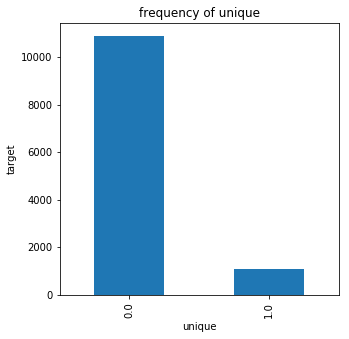

In [10]:
#plot data
fig = plt.subplots(1, 1,figsize = (5,5))
type(df_train['target'])
ax1 = df_all['target'].value_counts().plot('bar')
ax1.set_xlabel('unique')
ax1.set_ylabel('target')
ax1.set_title('frequency of unique')

In [11]:
plt.savefig(dirPData + 'target_freq.png')

<Figure size 432x288 with 0 Axes>

**Naive solution**
Choose the mean - predict probability of crash as 0.09078 -> Kaggle Score 0.5

In [12]:
df_train['target'].mean()

0.09078749373014545

In [13]:
df_all[vars_ind_categorical].nunique() #check for number of unique for each character variable

v_char_1       2
v_char_2      13
v_char_3       3
v_char_4       2
v_char_5       5
v_char_6       3
v_char_7       4
v_char_8       2
v_char_9       4
v_char_10      2
v_char_11      2
v_char_12      4
v_char_13      2
v_char_14      2
v_char_15      2
v_char_16      2
v_char_17      2
v_char_18      4
v_char_19      3
v_char_20      2
v_char_21      5
v_char_22      2
v_char_23      2
v_char_24      2
v_char_25      2
v_char_26      3
v_char_27      6
v_char_28      4
v_char_29      4
v_char_30      2
              ..
v_char_94      3
v_char_95      2
v_char_96      3
v_char_97      4
v_char_98      2
v_char_99      3
v_char_100    36
v_char_101     9
v_char_102     2
v_char_103     6
v_char_104     2
v_char_105    11
v_char_106     4
v_char_107     2
v_char_108     2
v_char_109     7
v_char_110     2
v_char_111     2
v_char_112    13
v_char_113     5
v_char_114     2
v_char_115     3
v_char_116     2
v_char_117     2
v_char_118     9
v_char_119     2
v_char_120     2
v_char_121    

In [14]:
print(np.unique(df_all['v_char_100']))

['A' 'B' 'E' 'G' 'H' 'I' 'L' 'N' 'O' 'P' 'Q' 'S' 'U' 'V' 'W' 'X' 'Y' 'b'
 'c' 'd' 'f' 'g' 'h' 'i' 'k' 'm' 'o' 'p' 'q' 's' 't' 'u' 'v' 'w' 'x' 'z']


Text(0.5, 1.0, 'frequency of unique')

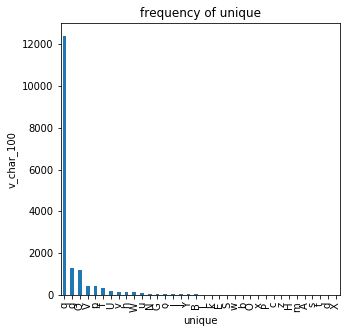

In [15]:
fig = plt.subplots(1, 1,figsize = (5,5))
ax1 = df_all['v_char_100'].value_counts().plot('bar')
ax1.set_xlabel('unique')
ax1.set_ylabel('v_char_100')
ax1.set_title('frequency of unique')

In [16]:
df_all[vars_ind_num].nunique() #check for number of unique in each numeric variable

id           17083
v_num_1         12
v_num_2         20
v_num_3         10
v_num_4          5
v_num_5         19
v_num_6          5
v_num_7         15
v_num_8          4
v_num_9          4
v_num_10        12
v_num_11         6
v_num_12         2
v_num_13         2
v_num_14        15
v_num_15        18
v_num_16        11
v_num_17         3
v_num_18        21
v_num_19         2
v_num_20        18
v_num_21        13
v_num_22         2
v_num_23        18
v_num_24        20
v_num_25         4
v_num_26         3
v_num_27        14
v_num_28        20
v_num_29         6
             ...  
v_num_79        21
v_num_80        20
v_num_81        20
v_num_82         3
v_num_84         3
v_num_85         2
v_num_86        17
v_num_87         2
v_num_88         8
v_num_89         4
v_num_90         2
v_num_91         3
v_num_92        18
v_num_94         4
v_num_95         2
v_num_96        12
v_num_97        16
v_num_98        21
v_num_99         2
v_num_100        3
v_num_101        2
v_num_102   

In [17]:
#check for missing data
print(df_all.shape)
df_missing = df_all.isnull().sum(axis=0)
df_missing[df_missing>0] #target has NaN for test data

(17083, 232)


target    5121
dtype: int64

**Store variables into dictionary**

In [18]:
dict_ = {'df_all': df_all,
        'vars_ind_num': vars_ind_num,
        'vars_ind_categorical': vars_ind_categorical}

f_name = dirPData + '01_df_all.pickle'
with open(f_name, "wb") as f:
    pickle.dump(dict_, f)
del f_name